In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
import math
from tensorflow import keras

#tf version should be 2.5 or higher
tf.__version__

'2.6.0'

In [3]:
#get data
(train_images, train_labels), (test_images, test_labels) = \
      keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
#scale model
# train_images = train_images / 255.0
# test_images = test_images / 255.0

# reshape inputs for CNN layers
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
train_images = train_images / 255.0
test_images = test_images / 255.0
 

In [5]:
#setup CNN model
model = keras.Sequential([
      # tf.keras.layers.Reshape(input_shape=(28*28,), target_shape(28,28,1)),

      keras.layers.Conv2D(kernel_size = 3, filters = 40, activation = 'relu', padding = 'same', input_shape=(28,28,1)), 
      tf.keras.layers.BatchNormalization(center = True, scale = False),
      tf.keras.layers.Activation('relu'),

      keras.layers.Conv2D(kernel_size = 6, filters = 80, activation = 'relu', padding = 'same', strides = 2),
      tf.keras.layers.BatchNormalization(center = True, scale = False),
      tf.keras.layers.Activation('relu'),

      keras.layers.Conv2D(kernel_size = 6, filters = 120, activation = 'relu', padding = 'same', strides = 2),
      tf.keras.layers.BatchNormalization(center = True, scale = False),
      tf.keras.layers.Activation('relu'),

      keras.layers.Flatten(),

      keras.layers.Dense(200, use_bias = False),
      tf.keras.layers.BatchNormalization(center = True, scale = False),
      tf.keras.layers.Activation('relu'),
      keras.layers.Dropout(0.25),

      keras.layers.Dense(100, activation = 'relu'),
       tf.keras.layers.BatchNormalization(center = True, scale = False),
      tf.keras.layers.Activation('relu'),
      keras.layers.Dropout(0.25),

      keras.layers.Dense(10, activation = 'softmax')
      ])

In [6]:
#compile model
model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [7]:
#lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.6, epoch)

#lr schedule callback
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay,)

In [8]:
#train model
model.fit(train_images, train_labels, epochs=10, callbacks = [lr_decay_callback])

Epoch 1/10
1875/1875 [==============================] - 26s 4ms/step - loss: 0.4956 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3112 - accuracy: 0.8873
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2438 - accuracy: 0.9117
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1908 - accuracy: 0.9299
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1449 - accuracy: 0.9467
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1111 - accuracy: 0.9584
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0845 - accuracy: 0.9677
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0696 - accuracy: 0.9739
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0600 - accuracy: 0.9777
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.05

In [9]:
#evaluate
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2700 - accuracy: 0.9311

Test accuracy: 0.9311000108718872


In [10]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:10])

In [11]:
# Print our model's predictions
print(np.argmax(predictions, axis=1))

[9 2 1 1 6 1 4 6 5 7]


In [12]:
# Check our predictions against the ground truths
print(test_labels[:10]) # [7, 2, 1, 0, 4]

[9 2 1 1 6 1 4 6 5 7]


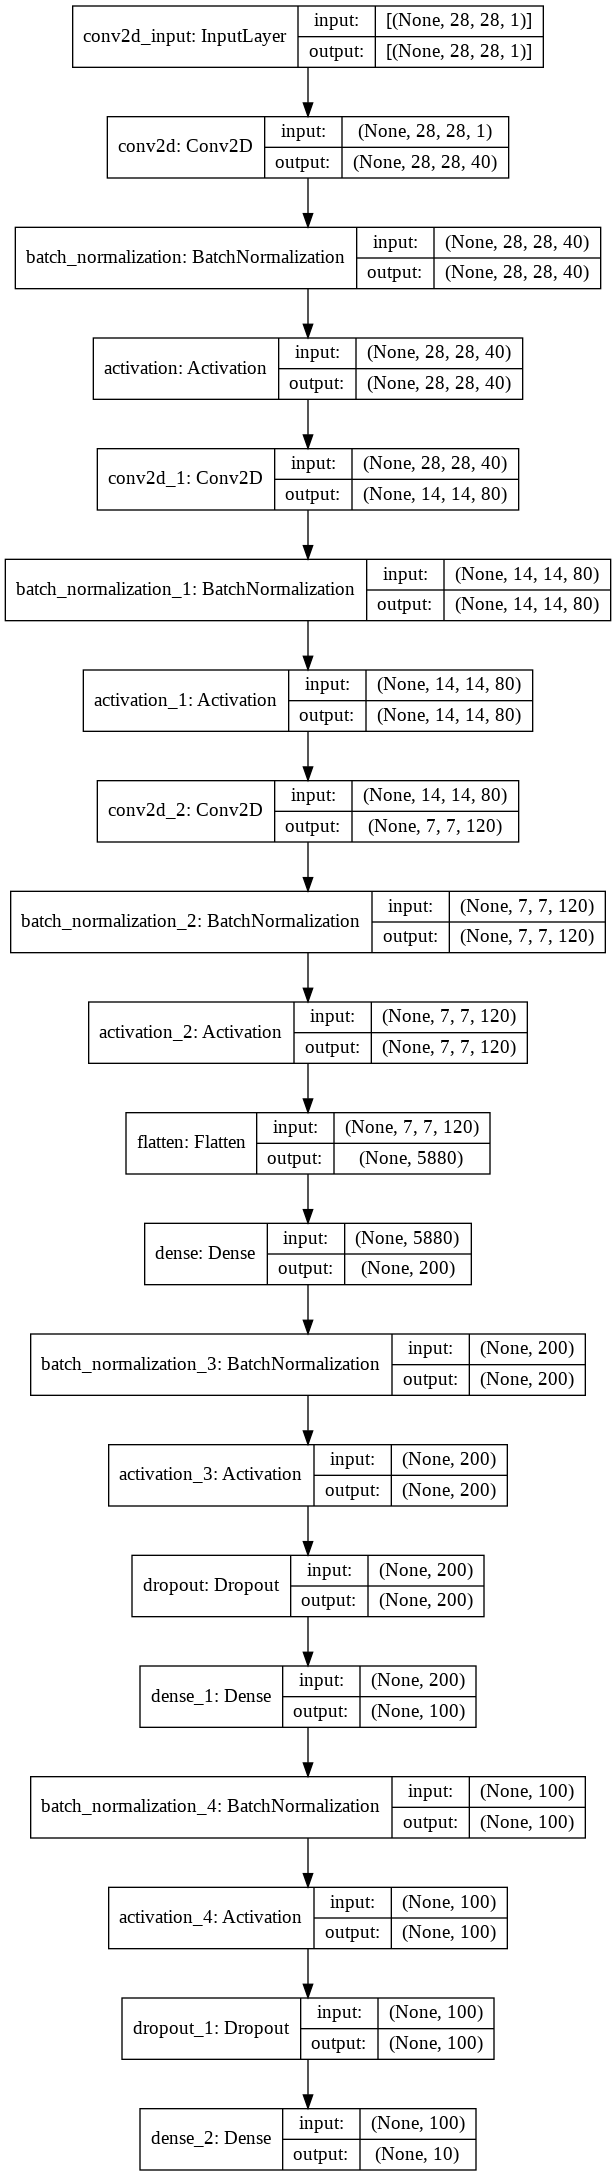

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)